In [28]:
# Librerias para leer, explorar y visualizar los datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# libreria para el train test split
from sklearn.model_selection import train_test_split
# librerias de deep learning para pre-procesamiento de texto
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences
# Modelado 
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [19]:
df_GPT = pd.read_csv('./datos/ensayos_GPT.csv')
df_humanos = pd.read_csv('./datos/ensayos_humanos.csv')

In [20]:
df_GPT.describe()

,Ensayo
count,38
unique,38
top,La inteligencia artificial (IA) es la capacida...
freq,1


In [21]:
df_humanos.describe()

,Ensayo
count,46
unique,46
top,"Conciencia ecológica, un factor clave para el ..."
freq,1


In [24]:
df_GPT['etiqueta'] = 'GPT'
df_humanos['etiqueta'] = 'humanos'

In [25]:
df_GPT.head()

,Ensayo,etiqueta
0,La inteligencia artificial (IA) es la capacida...,GPT
1,El cambio climático es la alteración del clima...,GPT
2,La educación a distancia es una modalidad de e...,GPT
3,La violencia de género es toda forma de violen...,GPT
4,El veganismo es una filosofía y un estilo de v...,GPT


In [26]:
# Creamos lista de numpy para visualizar usando wordcloud
GPT_text = " ".join(df_GPT.Ensayo.to_numpy().tolist())
humanos_text = " ".join(df_humanos.Ensayo.to_numpy().tolist())

In [29]:
# Estableciendo las stopwords del español
stopwords = set(stopwords.words('spanish'))

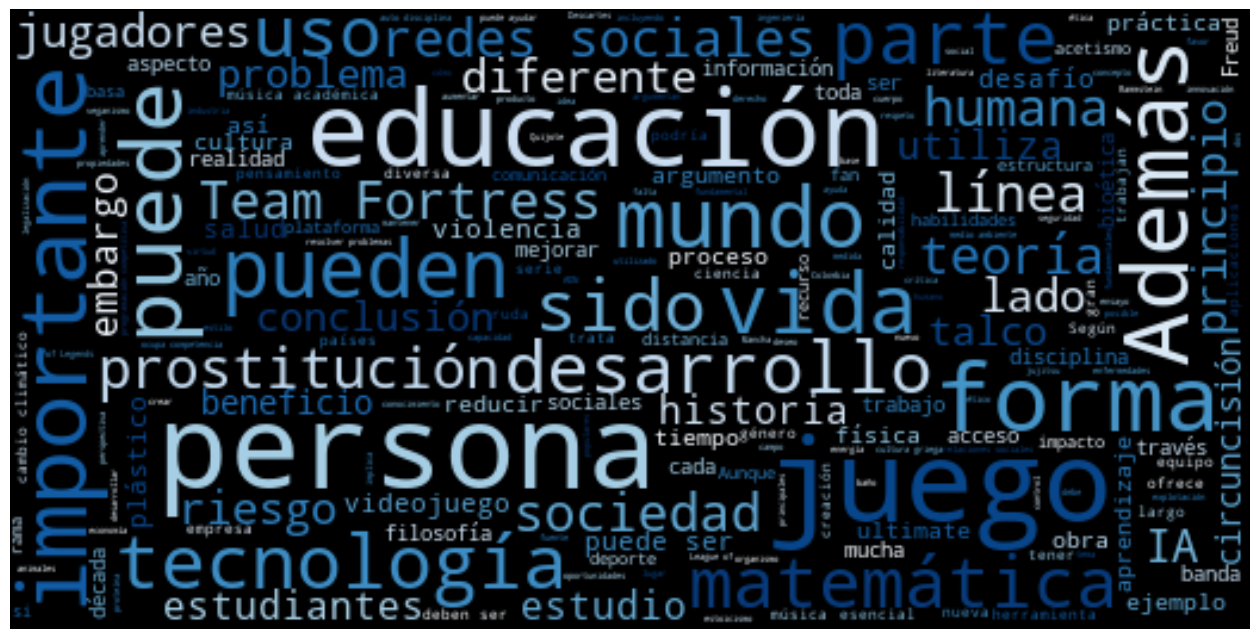

In [30]:
# wordcloud de ensayos GPT
GPT_cloud = WordCloud(width =520, height =260, stopwords=stopwords,max_font_size=50, background_color ="black", colormap='Blues').generate(GPT_text)
plt.figure(figsize=(16,10))
plt.imshow(GPT_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

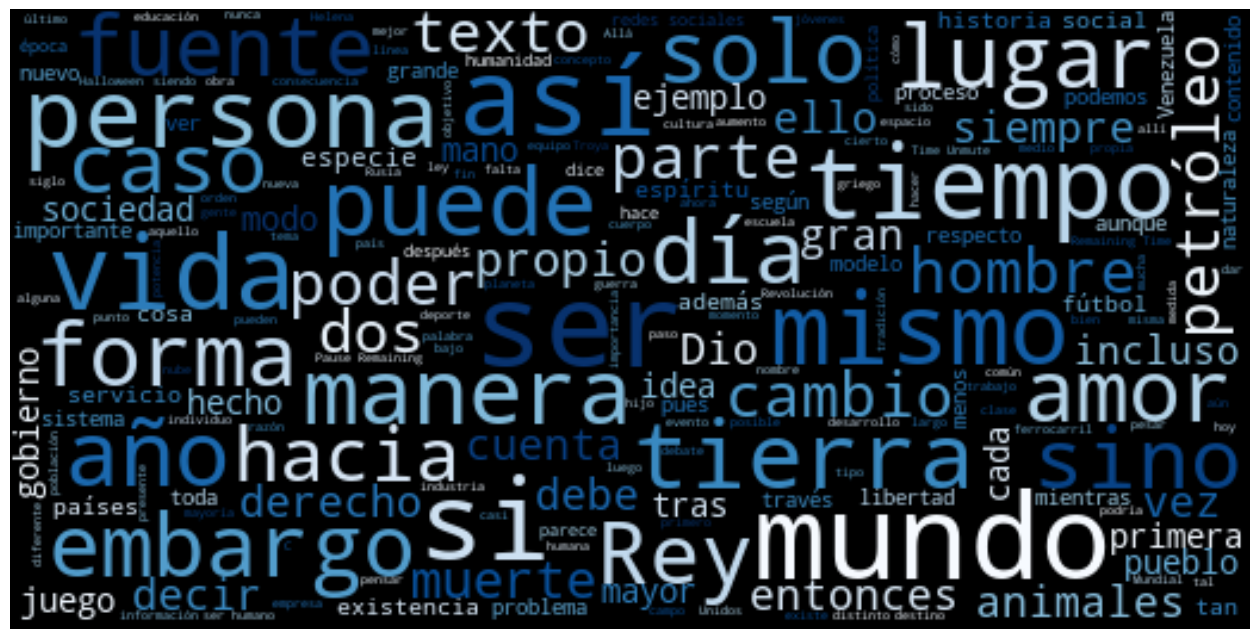

In [31]:
# wordcloud de ensayos humanos
humanos_cloud = WordCloud(width =520, height =260, stopwords=stopwords,max_font_size=50, background_color ="black", colormap='Blues').generate(humanos_text)
plt.figure(figsize=(16,10))
plt.imshow(humanos_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

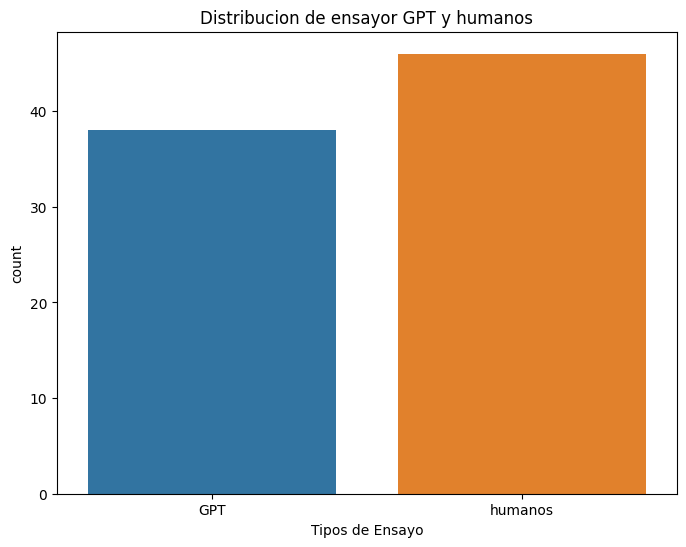

In [39]:
# Visualizando la cantidad de ensayos de cada categoria
ensayos_df = pd.concat([df_GPT, df_humanos]).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(data=ensayos_df, x=ensayos_df['etiqueta'])
plt.title('Distribucion de ensayor GPT y humanos')
plt.xlabel('Tipos de Ensayo')
plt.show()